<a href="https://colab.research.google.com/github/PeeranatK/ML-university-year4/blob/main/grad_des.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import math

df=pd.read_csv('Advertising.csv', index_col = 0)
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [ ]:
sel_program = 'newspaper'
#X=df[['TV', 'radio', 'newspaper']]
X=df[['radio']]
Y=df['sales']
Y=np.array((Y-Y.mean())/Y.std())
#X = np.array((X-X.mean())/X.std())

X=X.apply(lambda rec:(rec-rec.mean())/rec.std(),axis=0)

In [ ]:
def initialize(dim):
    b=random.random()
    a=np.random.rand(dim)
    return b,a

In [ ]:
def predict_Y(b,a,X):
    return b + np.dot(X,a)

In [ ]:
def get_cost(Y,Y_hat):
    Y_resd=Y-Y_hat
    return np.sum(np.dot(Y_resd.T,Y_resd))/len(Y-Y_resd)

In [ ]:
def update_theta(x,y,y_hat,b_0,theta_o,learning_rate):
    db=(np.sum(y_hat-y)*2)/len(y)
    dw=(np.dot((y_hat-y),x)*2)/len(y)
    b_1=b_0-learning_rate*db
    theta_1=theta_o-learning_rate*dw
    return b_1,theta_1

In [ ]:
def run_gradient_descent(X,Y,alpha,num_iterations):
    #tolerance = 1e-02
    tolerance = 1e-06
    b,theta=initialize(X.shape[1])

    gd_iterations_df=pd.DataFrame(columns=['iteration','value_b', 'value_weight', 'cost'])
    result_idx=0
    old_cost=0

    for iter_num in range(num_iterations):
        Y_hat=predict_Y(b,theta,X)

        this_cost=get_cost(Y,Y_hat)
        prev_b=b
        prev_theta=theta
        b,theta=update_theta(X,Y,Y_hat,prev_b,prev_theta,alpha)
        gd_iterations_df.loc[result_idx]=[iter_num,b, theta[0], this_cost]
        result_idx=result_idx+1
        if (abs(this_cost - old_cost) <= tolerance):
            break
        old_cost=this_cost
    return gd_iterations_df,b,theta

gd_iterations_df,b,theta=run_gradient_descent(X,Y,alpha=0.01,num_iterations=400)
gd_iterations_df

,iteration,value_b,value_weight,cost
0,0.0,0.931971,0.934275,1.701804
1,1.0,0.913331,0.927150,1.660757
2,2.0,0.895065,0.920166,1.621336
3,3.0,0.877163,0.913322,1.583474
4,4.0,0.859620,0.906614,1.547111
...,...,...,...,...
261,261.0,0.004780,0.578108,0.664655
262,262.0,0.004684,0.578071,0.664654
263,263.0,0.004591,0.578034,0.664653
264,264.0,0.004499,0.577998,0.664652


In [ ]:
#sns.scatterplot(data=gd_iterations_df, x="value_weight", y="cost")

In [ ]:
idx = gd_iterations_df['cost'].argmin()
best_parameters = gd_iterations_df.loc[idx, ['value_b', 'value_weight']]
best_parameters['value_weight']


0.2326135879136799

In [ ]:
x = df[sel_program]
y_ini = gd_iterations_df.loc[0, 'value_b'] + gd_iterations_df.loc[0, 'value_weight']*x
y_hat = gd_iterations_df.loc[idx, 'value_b'] + gd_iterations_df.loc[idx, 'value_weight']*x

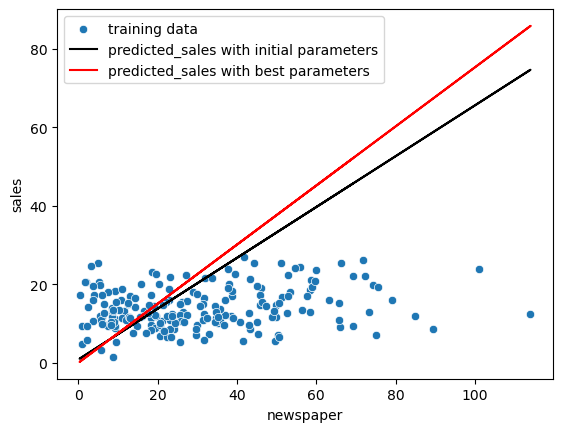

In [ ]:
sns.scatterplot(data=df, x=sel_program, y="sales")
plt.plot( x,  y_ini, 'k', x, y_hat, 'r')
plt.legend(['training data', 'predicted_sales with initial parameters',
            'predicted_sales with best parameters'])
plt.show()